In [1]:
from google.colab import drive
import os

drive.mount('/content/drive')

!unzip -q "/content/drive/MyDrive/handgesture.zip" -d /content/dataset

print("Unzipping complete!")

Mounted at /content/drive
Unzipping complete!


In [3]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import classification_report, accuracy_score, precision_recall_fscore_support

TRAIN_DIR = '/content/dataset/train/train'
TEST_DIR = '/content/dataset/test/test'

IMG_SIZE = (224, 224)
BATCH_SIZE = 32

print("Loading datasets...")
train_ds = tf.keras.utils.image_dataset_from_directory(
    TRAIN_DIR, shuffle=True, batch_size=BATCH_SIZE, image_size=IMG_SIZE
)

test_ds = tf.keras.utils.image_dataset_from_directory(
    TEST_DIR, shuffle=False, batch_size=BATCH_SIZE, image_size=IMG_SIZE
)

class_names = train_ds.class_names
print(f"Detected Classes: {class_names}")

Loading datasets...
Found 18000 files belonging to 20 classes.
Found 6000 files belonging to 20 classes.
Detected Classes: ['0', '1', '10', '11', '12', '13', '14', '15', '16', '17', '18', '19', '2', '3', '4', '5', '6', '7', '8', '9']


In [4]:
# Load MobileNetV2
base_model = tf.keras.applications.MobileNetV2(
    input_shape=IMG_SIZE + (3,), include_top=False, weights='imagenet'
)
base_model.trainable = False

inputs = tf.keras.Input(shape=IMG_SIZE + (3,))
x = tf.keras.applications.mobilenet_v2.preprocess_input(inputs)
x = base_model(x, training=False)
x = tf.keras.layers.GlobalAveragePooling2D()(x)
x = tf.keras.layers.Dropout(0.2)(x)
outputs = tf.keras.layers.Dense(len(class_names), activation='softmax')(x)

model = tf.keras.Model(inputs, outputs)

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train the model
print("Starting training...")
history = model.fit(train_ds, validation_data=test_ds, epochs=10)

9406464/9406464 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step
Starting training...
Epoch 1/10
563/563 ━━━━━━━━━━━━━━━━━━━━ 60s 73ms/step - accuracy: 0.8562 - loss: 0.6196 - val_accuracy: 0.9918 - val_loss: 0.0412
Epoch 2/10
563/563 ━━━━━━━━━━━━━━━━━━━━ 26s 47ms/step - accuracy: 0.9991 - loss: 0.0165 - val_accuracy: 0.9940 - val_loss: 0.0258
Epoch 3/10
563/563 ━━━━━━━━━━━━━━━━━━━━ 36s 38ms/step - accuracy: 0.9996 - loss: 0.0074 - val_accuracy: 0.9950 - val_loss: 0.0200
Epoch 4/10
563/563 ━━━━━━━━━━━━━━━━━━━━ 21s 37ms/step - accuracy: 0.9999 - loss: 0.0040 - val_accuracy: 0.9958 - val_loss: 0.0174
Epoch 5/10
563/563 ━━━━━━━━━━━━━━━━━━━━ 22s 38ms/step - accuracy: 0.9999 - loss: 0.0028 - val_accuracy: 0.9963 - val_loss: 0.0170
Epoch 6/10
563/563 ━━━━━━━━━━━━━━━━━━━━ 21s 37ms/step - accuracy: 1.0000 - loss: 0.0019 - val_accuracy: 0.9963 - val_loss: 0.0156
Epoch 7/10
563/563 ━━━━━━━━━━━━━━━━━━━━ 21s 37ms/step - accuracy: 0.9999 - loss: 0.0017 - val_accuracy: 0.9943 - val_loss: 0.0212
Epoch 8/10
563/563 ━

In [5]:
# 1. Get Predictions
y_true = np.concatenate([y for x, y in test_ds], axis=0)
y_pred_probs = model.predict(test_ds)
y_pred = np.argmax(y_pred_probs, axis=1)

# 2. Calculate Metrics
precision, recall, f1, _ = precision_recall_fscore_support(y_true, y_pred, average='weighted')
print(f"\nResults:\nAccuracy: {accuracy_score(y_true, y_pred):.4f}")
print(f"F1 Score: {f1:.4f}\nRecall: {recall:.4f}\nPrecision: {precision:.4f}")

# 3. Save the model back to Google Drive
model.save('/content/drive/MyDrive/hand_gesture_model_1.h5')
print("Model saved to Drive!")

188/188 ━━━━━━━━━━━━━━━━━━━━ 14s 52ms/step



Results:
Accuracy: 0.9962
F1 Score: 0.9962
Recall: 0.9962
Precision: 0.9963
Model saved to Drive!


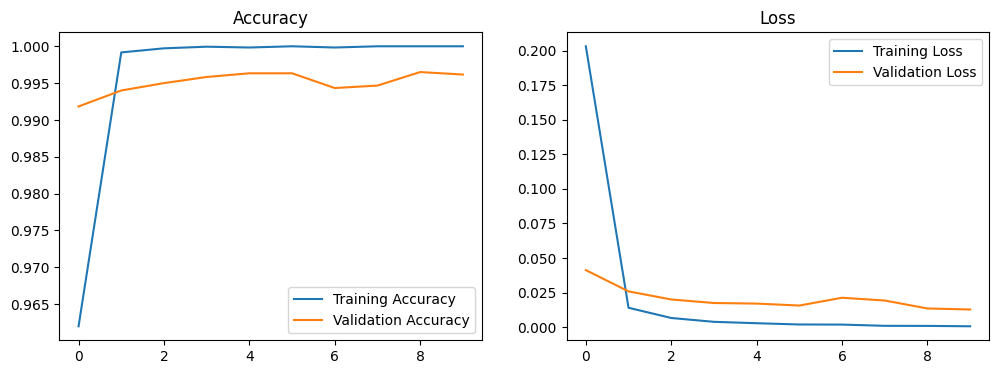

In [6]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.title('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.title('Loss')
plt.legend()
plt.show()